In [1]:
print('EDA')

EDA


In [2]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,All I Want For Christmas Is You,Everybody Knows the Claus,Fairytale of New York,Feliz Navidad,Happy Xmas (War Is Over),Have Yourself a Merry Little Christmas,I Saw Mommy Kissing Santa Claus,Jingle Bell Rock,Joy To The World,Last Christmas,Mistletoe,Santa Claus Is Comin’ to Town,The Chanukah Song,Wonderful Christmas Time
abbyharrison,0,0,0,0,0,0,0,0,0,0,0,0,1,0
advisory,0,0,1,0,0,0,0,0,0,0,0,0,0,0
againlast,0,0,0,0,0,0,0,0,0,2,0,0,0,0
agent,0,0,0,0,0,0,0,0,0,0,0,0,1,0
air,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [3]:
# Find the top 30 words written in the lyrics of the song
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'All I Want For Christmas Is You': [('want', 12),
  ('christmas', 8),
  ('just', 8),
  ('dont', 6),
  ('wont', 6),
  ('wish', 4),
  ('baby', 4),
  ('lot', 3),
  ('ownmore', 3),
  ('knowmake', 3),
  ('come', 3),
  ('bring', 2),
  ('thing', 2),
  ('care', 2),
  ('trueall', 2),
  ('wanna', 2),
  ('make', 2),
  ('presentsunderneath', 2),
  ('hear', 2),
  ('christmasthere', 2),
  ('hang', 1),
  ('stay', 1),
  ('brightly', 1),
  ('toy', 1),
  ('tree', 1),
  ('treei', 1),
  ('pole', 1),
  ('singingi', 1),
  ('click', 1),
  ('sleigh', 1)],
 'Everybody Knows the Claus': [('comes', 6),
  ('know', 6),
  ('hes', 6),
  ('santa', 6),
  ('mess', 4),
  ('wont', 4),
  ('claushere', 3),
  ('clausyou', 3),
  ('mandont', 3),
  ('big', 3),
  ('good', 3),
  ('thingseverybody', 3),
  ('door', 3),
  ('seen', 3),
  ('knows', 3),
  ('beforeyou', 3),
  ('clausdoin', 3),
  ('youve', 3),
  ('dont', 3),
  ('knockin', 3),
  ('want', 2),
  ('boss', 2),
  ('daydont', 2),
  ('cookies', 2),
  ('donuts', 1),
  ('try', 1

In [4]:
# Print the top 15 words written in the lyrics of the song
for songs, top_words in top_dict.items():
    print(songs)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

All I Want For Christmas Is You
want, christmas, just, dont, wont, wish, baby, lot, ownmore, knowmake, come, bring, thing, care
---
Everybody Knows the Claus
comes, know, hes, santa, mess, wont, claushere, clausyou, mandont, big, good, thingseverybody, door, seen
---
Fairytale of New York
christmas, old, ringing, bells, dreams, singing, bayand, outfor, nypd, boys, galway, day, got, choirstill
---
Feliz Navidad
wanna, wish, merry, navidadfeliz, christmasi, felicidad, prospero, navidad, aã, feliz, christmas, heart, hearti, faggothappy
---
Happy Xmas (War Is Over)
war, happy, want, hope, new, christmasand, year, christmas, merry, good, onewithout, overand, overfor, nowa
---
Have Yourself a Merry Little Christmas
merry, little, golden, troubles, bowand, away, highest, miles, star, friends, sight, gayfrom, dear, usgather
---
I Saw Mommy Kissing Santa Claus
santa, kissing, mommy, did, claus, believe, saw, beenif, seenmommy, night, laugh, daddy, clausunderneath, gotta
---
Jingle Bell Rock
jin

In [5]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each songs
words = []
for songs in data.columns:
    top = [word for (word, count) in top_dict[songs]]
    for t in top:
        words.append(t)
        
words

['want',
 'christmas',
 'just',
 'dont',
 'wont',
 'wish',
 'baby',
 'lot',
 'ownmore',
 'knowmake',
 'come',
 'bring',
 'thing',
 'care',
 'trueall',
 'wanna',
 'make',
 'presentsunderneath',
 'hear',
 'christmasthere',
 'hang',
 'stay',
 'brightly',
 'toy',
 'tree',
 'treei',
 'pole',
 'singingi',
 'click',
 'sleigh',
 'comes',
 'know',
 'hes',
 'santa',
 'mess',
 'wont',
 'claushere',
 'clausyou',
 'mandont',
 'big',
 'good',
 'thingseverybody',
 'door',
 'seen',
 'knows',
 'beforeyou',
 'clausdoin',
 'youve',
 'dont',
 'knockin',
 'want',
 'boss',
 'daydont',
 'cookies',
 'donuts',
 'try',
 'cokkie',
 'milk',
 'turkey',
 'usee',
 'christmas',
 'old',
 'ringing',
 'bells',
 'dreams',
 'singing',
 'bayand',
 'outfor',
 'nypd',
 'boys',
 'galway',
 'day',
 'got',
 'choirstill',
 'took',
 'youre',
 'eve',
 'cars',
 'eveyou',
 'cheap',
 'place',
 'drip',
 'timewhen',
 'drunk',
 'blows',
 'drunks',
 'true',
 'playingthey',
 'howled',
 'mewont',
 'wanna',
 'wish',
 'merry',
 'navidadfeliz

In [6]:
# Let's aggregate this list and identify the most common words along with how many times they appeared in
Counter(words).most_common()

[('christmas', 8),
 ('want', 4),
 ('dont', 4),
 ('good', 4),
 ('merry', 4),
 ('time', 4),
 ('just', 3),
 ('comes', 3),
 ('heart', 3),
 ('year', 3),
 ('wont', 2),
 ('wish', 2),
 ('baby', 2),
 ('wanna', 2),
 ('sleigh', 2),
 ('know', 2),
 ('hes', 2),
 ('santa', 2),
 ('knows', 2),
 ('youve', 2),
 ('old', 2),
 ('bells', 2),
 ('day', 2),
 ('got', 2),
 ('youre', 2),
 ('christmasi', 2),
 ('goodso', 2),
 ('goodness', 2),
 ('gonna', 2),
 ('goldie', 2),
 ('golden', 2),
 ('gotta', 2),
 ('glories', 2),
 ('gliding', 2),
 ('glassahhh', 2),
 ('giddyup', 2),
 ('gayfrom', 2),
 ('happy', 2),
 ('near', 2),
 ('dear', 2),
 ('hanukkah', 2),
 ('claus', 2),
 ('night', 2),
 ('really', 2),
 ('mistletoe', 2),
 ('im', 2),
 ('oh', 2),
 ('love', 2),
 ('lot', 1),
 ('ownmore', 1),
 ('knowmake', 1),
 ('come', 1),
 ('bring', 1),
 ('thing', 1),
 ('care', 1),
 ('trueall', 1),
 ('make', 1),
 ('presentsunderneath', 1),
 ('hear', 1),
 ('christmasthere', 1),
 ('hang', 1),
 ('stay', 1),
 ('brightly', 1),
 ('toy', 1),
 ('tree',

In [7]:
# If more than half of the song have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['christmas']

In [8]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [9]:
# Let's make some word clouds!

from wordcloud import WordCloud


wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

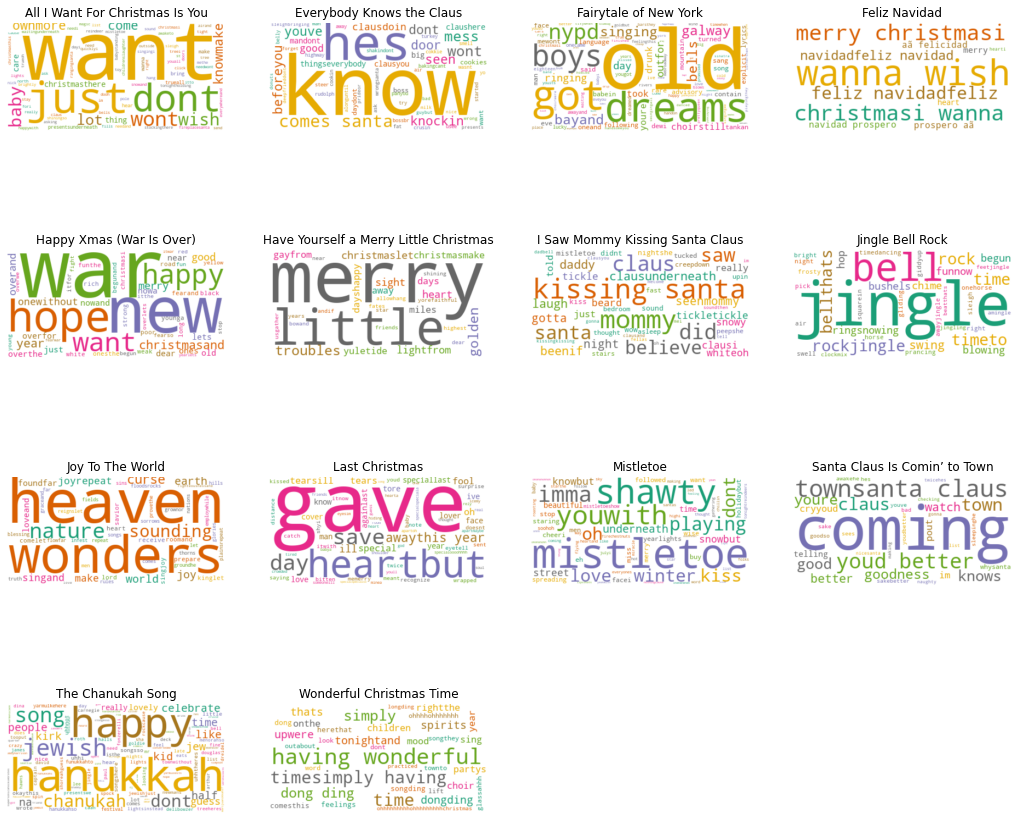

In [10]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [18, 16]

artist = ['All I Want For Christmas Is You', 'Everybody Knows the Claus', 'Fairytale of New York', 'Feliz Navidad', 'Happy Xmas (War Is Over)', 'Have Yourself a Merry Little Christmas', 'I Saw Mommy Kissing Santa Claus', 'Jingle Bell Rock',
           'Joy To The World', 'Last Christmas', 'Mistletoe', 'Santa Claus Is Comin’ to Town', 'The Chanukah Song', 'Wonderful Christmas Time']

# Create subplots for each songs
for index, songs in enumerate(data.columns):
    wc.generate(data_clean.transcript[songs])
    
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(artist[index])
    
plt.show()

In [11]:
# Find the number of unique words that each songs used.

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for songs in data.columns:
    uniques = data[songs].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(artist, unique_list)), columns=['songs', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,songs,unique_words
3,Feliz Navidad,13
5,Have Yourself a Merry Little Christmas,29
11,Santa Claus Is Comin’ to Town,33
7,Jingle Bell Rock,37
13,Wonderful Christmas Time,37
4,Happy Xmas (War Is Over),51
6,I Saw Mommy Kissing Santa Claus,51
8,Joy To The World,51
1,Everybody Knows the Claus,60
9,Last Christmas,70


In [13]:
# Listing the artists
# Find the total number of words that songs used
total_list = []
for songs in data.columns:
    totals = sum(data[songs])
    total_list.append(totals)
    
# Song lengths from youtube, in minutes and seconds
##song_length = [3.55, 4.02, 4.46, 3.04, 3.35, 2.14, 3.11, 2.09, 4.20, 4.39, 3.10, 3.12, 3.55, 3.46]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
##data_words['song_length'] = song_length


# Sort the dataframe by the song length of the song 
data_ttw_sort = data_words.sort_values(by='total_words')
data_ttw_sort



,songs,unique_words,total_words
5,Have Yourself a Merry Little Christmas,29,35
7,Jingle Bell Rock,37,66
8,Joy To The World,51,70
4,Happy Xmas (War Is Over),51,101
6,I Saw Mommy Kissing Santa Claus,51,111
11,Santa Claus Is Comin’ to Town,33,112
1,Everybody Knows the Claus,60,118
13,Wonderful Christmas Time,37,122
3,Feliz Navidad,13,127
0,All I Want For Christmas Is You,79,137


In [15]:
#I will also add the length of the song

song_length = []
for songs in data.columns:
    songl = sum(data[songs])
    song_length.append(songl)
    
# Song lengths from youtube, in minutes and seconds
song_length = [3.55, 4.02, 4.46, 3.04, 3.35, 2.14, 3.11, 2.09, 4.20, 4.39, 3.10, 3.12, 3.55, 3.46]
    
# Let's add some more columns to our dataframe
data_words['song_length'] = song_length

# sort the dataframe by the length of the song
data_slg_sort = data_words.sort_values(by='song_length')
data_slg_sort

,songs,unique_words,total_words,song_length
7,Jingle Bell Rock,37,66,2.09
5,Have Yourself a Merry Little Christmas,29,35,2.14
3,Feliz Navidad,13,127,3.04
10,Mistletoe,75,156,3.10
6,I Saw Mommy Kissing Santa Claus,51,111,3.11
11,Santa Claus Is Comin’ to Town,33,112,3.12
4,Happy Xmas (War Is Over),51,101,3.35
13,Wonderful Christmas Time,37,122,3.46
0,All I Want For Christmas Is You,79,137,3.55
12,The Chanukah Song,129,155,3.55


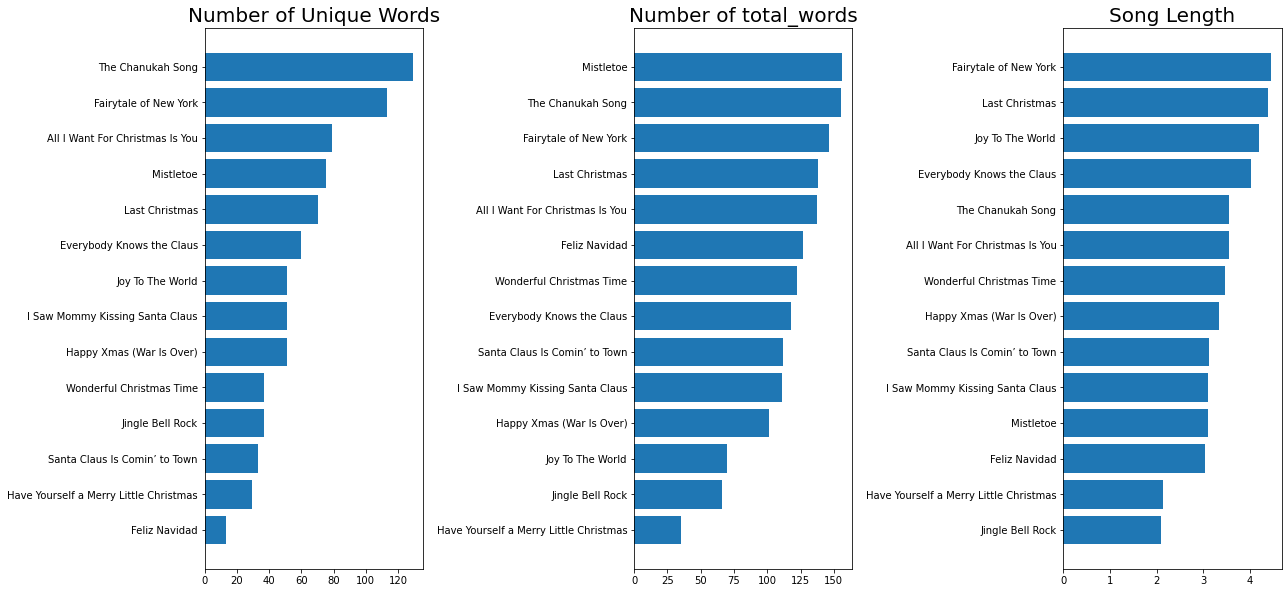

In [29]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(2, 3, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.songs)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(2, 3, 2)
plt.barh(y_pos, data_ttw_sort.total_words, align='center')
plt.yticks(y_pos, data_ttw_sort.songs)
plt.title('Number of total_words', fontsize=20)

plt.subplot(2, 3, 3)
plt.barh(y_pos, data_slg_sort.song_length, align='center')
plt.yticks(y_pos, data_slg_sort.songs)
plt.title('Song Length', fontsize=20)

plt.tight_layout()
plt.show()

In [17]:
print('EDA DONE')
print('BY : BENEDICTO')

EDA DONE
BY : BENEDICTO


In [30]:
print(' ===================================================== E N D =======================================================')

 ===================================================== E N D =======================================================
